In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")

In [6]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Feature Engineering and Data Cleaning

In [7]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [9]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
(data['Geography']=='France').sum()

5014

In [12]:
print("No. of Customers in France ---->",(data['Geography']=='France').sum())
print("No. of Customers in Germany ---->",(data['Geography']=='Germany').sum())
print("No. of Customers in Spain ---->",(data['Geography']=='Spain').sum())

No. of Customers in France ----> 5014
No. of Customers in Germany ----> 2509
No. of Customers in Spain ----> 2477


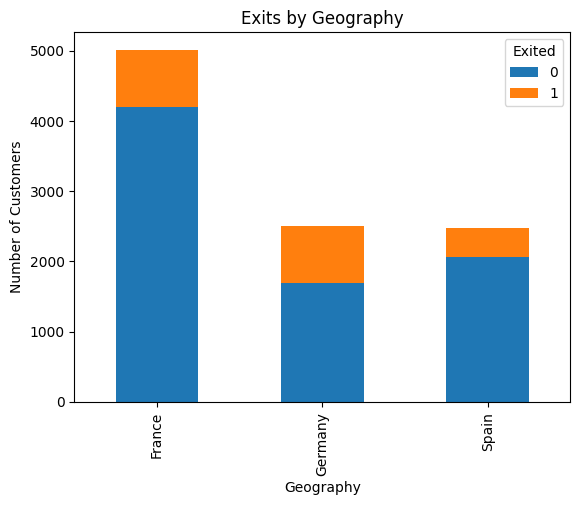

In [13]:
geography_exits = data.groupby(['Geography', 'Exited']).size().unstack()

geography_exits.plot(kind='bar', stacked=True)
plt.title('Exits by Geography')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.show()


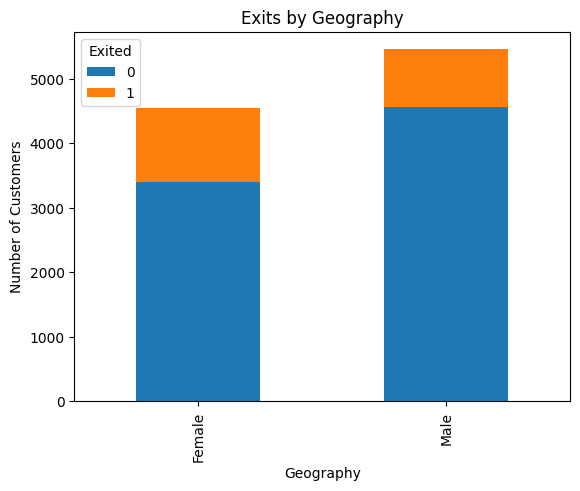

In [14]:
geography_exits = data.groupby(['Gender', 'Exited']).size().unstack()

geography_exits.plot(kind='bar', stacked=True)
plt.title('Exits by Geography')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.show()


# Standerization Part

In [15]:
data['Gender']=np.where(data['Gender']=='Male',1,0)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

encoded_features = encoder.fit_transform(data[['Geography']])

encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Geography']))

data = pd.concat([data.drop('Geography', axis=1), encoded_df], axis=1)


In [19]:
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


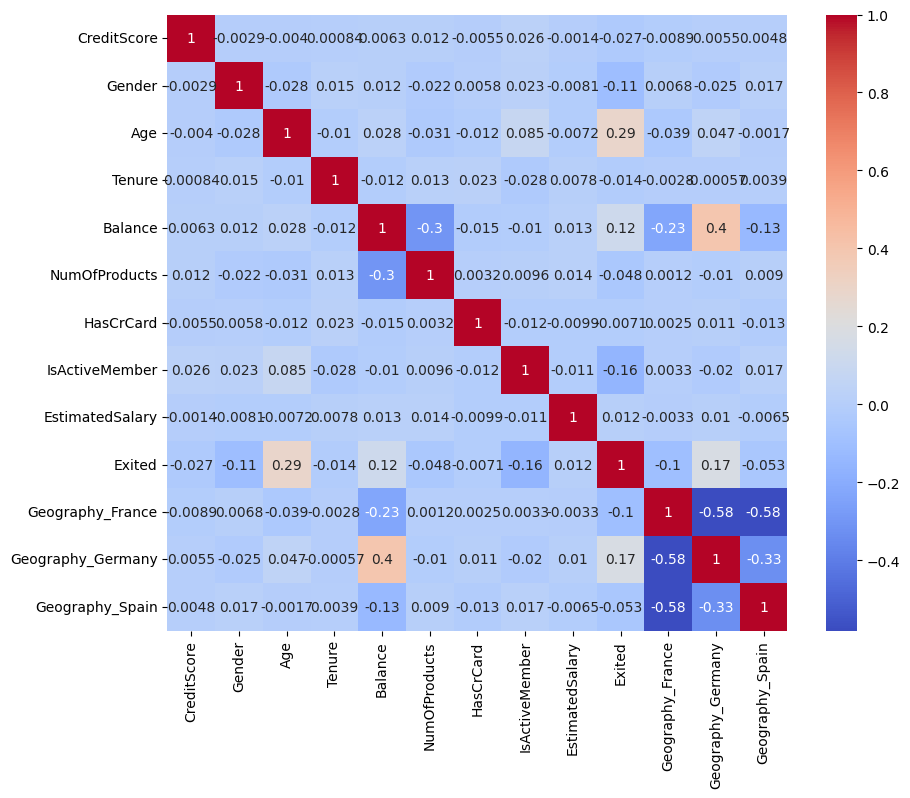

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [21]:
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


I have completed the analysis, feature engineering, data cleaning, and standardization. My next target is model training.


In [22]:
X=data.drop('Exited',axis=1)
y=data['Exited']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Model Traning by ML Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators= 200, min_samples_split= 10, max_depth= 20)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=200)

In [ ]:
rf.score(X_test,y_test)

0.8696666666666667

In [ ]:
rf.score(X_train,y_train)

0.9282857142857143

In [ ]:
data.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
def predict():
  credit_score=int(input("Enter the Credit Score: "))
  temp=(input("Enter the Gender(male or female): "))
  if temp.lower()=='male':
    gender=1
  else:
    gender=0
  age=int(input("Enter the Age: "))
  tenure=int(input("Enter the Tenure: "))
  balance=float(input("Enter the Balance: "))
  numofproducts=int(input("Enter the Number of Products: "))
  temp=(input("Enter the credit card Status(yes or no) "))
  if temp.lower()=='yes':
    hascrcard=1
  else:
    hascrcard=0
  temp=(input("Enter the Active Member Status(yes or no): "))
  if temp.lower()=='yes':
    isactivemem=1
  else:
    isactivemem=0
  estimatedsalary=float(input("Enter the Estimated Salary: "))
  temp=(input("Enter the Geography(France,Germany,Spain): "))
  if temp.lower()=='france':
    geo_f=1
    geo_g=0
    geo_s=0
  elif temp.lower()=='germany':
    geo_f=0
    geo_g=1
    geo_s=0
  else:
    geo_f=0
    geo_g=0
    geo_s=1
  inpt=[credit_score,gender,age,tenure,balance,numofproducts,hascrcard,isactivemem,estimatedsalary,geo_f,geo_g,geo_s]
  inpt=np.array(inpt)
  inpt=inpt.reshape(1,-1)
  inpt=scaler.transform(inpt)
  print()
  if(inpt[0]==0):
    print("The Customer will not Exit")
  else:
    print("The Customer will Exit")

In [ ]:
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


After Hypertuning and all i got the accuracy of 90% on model by using ML models


# Using Deep Learning (ANN) Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [ ]:
model=Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)), ## HL1 Connected wwith input layer
    Dense(32,activation='relu'), ## HL2
    Dense(1,activation='sigmoid')  ## output layer
]

)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
loss=tensorflow.keras.losses.BinaryCrossentropy()
# loss

In [ ]:
model.compile(optimizer=opt,loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
## Set up the Tensorboard
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

In [ ]:
## Set up Early Stopping
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)


In [ ]:
### Train the model
history=model.fit(
    X_train,y_train,validation_data=(X_test,y_test),epochs=100,
    callbacks=[tensorflow_callback,early_stopping_callback]
)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8087 - loss: 0.4426 - val_accuracy: 0.8617 - val_loss: 0.3516
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8451 - loss: 0.3683 - val_accuracy: 0.8657 - val_loss: 0.3564
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8488 - loss: 0.3638 - val_accuracy: 0.8653 - val_loss: 0.3410
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8590 - loss: 0.3458 - val_accuracy: 0.8673 - val_loss: 0.3320
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8625 - loss: 0.3390 - val_accuracy: 0.8643 - val_loss: 0.3396
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8648 - loss: 0.3335 - val_accuracy: 0.8647 - val_loss: 0.3510
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8689 - loss: 0.3257 - val_accuracy: 0.8653 - val_loss: 0.3403
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8542 - loss: 0.3389 - val_accu

In [ ]:
model.evaluate(X_test,y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8676 - loss: 0.3275


[0.3285844326019287, 0.8686666488647461]

# Prediction by user input

In [ ]:
def predict():
  credit_score=int(input("Enter the Credit Score: "))
  temp=(input("Enter the Gender(male or female): "))
  if temp.lower()=='male':
    gender=1
  else:
    gender=0
  age=int(input("Enter the Age: "))
  tenure=int(input("Enter the Tenure: "))
  balance=float(input("Enter the Balance: "))
  numofproducts=int(input("Enter the Number of Products: "))
  temp=(input("Enter the credit card Status(yes or no) "))
  if temp.lower()=='yes':
    hascrcard=1
  else:
    hascrcard=0
  temp=(input("Enter the Active Member Status(yes or no): "))
  if temp.lower()=='yes':
    isactivemem=1
  else:
    isactivemem=0
  estimatedsalary=float(input("Enter the Estimated Salary: "))
  temp=(input("Enter the Geography(France,Germany,Spain): "))
  if temp.lower()=='france':
    geo_f=1
    geo_g=0
    geo_s=0
  elif temp.lower()=='germany':
    geo_f=0
    geo_g=1
    geo_s=0
  else:
    geo_f=0
    geo_g=0
    geo_s=1
  inpt=[credit_score,gender,age,tenure,balance,numofproducts,hascrcard,isactivemem,estimatedsalary,geo_f,geo_g,geo_s]
  inpt=np.array(inpt)
  inpt=inpt.reshape(1,-1)
  inpt=scaler.transform(inpt)
  print()
  prediction=model.predict(inpt)
  if(prediction[0][0]<0.5):
    print("The Customer will not Exit")
  else:
    print("The Customer will Exit")

In [ ]:
predict()

Enter the Credit Score: 772
Enter the Gender(male or female): male
Enter the Age: 42
Enter the Tenure: 3
Enter the Balance: 75075
Enter the Number of Products: 2
Enter the credit card Status(yes or no) yes
Enter the Active Member Status(yes or no): no
Enter the Estimated Salary: 9288
Enter the Geography(France,Germany,Spain): germany

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The Customer will not Exit


# Practice

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping , TensorBoard

In [34]:
model = Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
early_stopiing=EarlyStopping(patience=10,restore_best_weights=True)

In [42]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,callbacks=[early_stopiing])

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6875 - loss: 0.5711 - val_accuracy: 0.8273 - val_loss: 0.3983
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8237 - loss: 0.4056 - val_accuracy: 0.8483 - val_loss: 0.3691
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8527 - loss: 0.3632 - val_accuracy: 0.8590 - val_loss: 0.3528
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8532 - loss: 0.3513 - val_accuracy: 0.8593 - val_loss: 0.3454
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8525 - loss: 0.3491 - val_accuracy: 0.8643 - val_loss: 0.3431
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8583 - loss: 0.3389 - val_accuracy: 0.8660 - val_loss: 0.3439
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8601 - loss: 0.3336 - val_accuracy: 0.8620 - val_loss: 0.3443
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8630 - loss: 0.3347 - val_accu

In [43]:
model.evaluate(X_test,y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8686 - loss: 0.3409


[0.3387046158313751, 0.8669999837875366]

# ANN Regression

In [44]:
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


In [45]:
X=data.drop('EstimatedSalary',axis=1)
y=data['EstimatedSalary']

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [50]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [51]:
model=Sequential([
    Dense(64,activation='relu',input_shape=(X_train[1].shape)),
    Dense(32,activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
def rmse(y_test, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_test - y_pred)))

In [55]:
from tensorflow.keras.losses import Huber
model.compile(optimizer='adam',loss=Huber(),metrics=[rmse])

In [56]:
call_back=EarlyStopping(patience=10,restore_best_weights=True)

In [57]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,callbacks=[call_back])

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 100997.0000 - rmse: 115804.1562 - val_loss: 98229.3984 - val_rmse: 113198.9766
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 100676.3984 - rmse: 115499.8750 - val_loss: 97138.7188 - val_rmse: 112248.3906
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 99366.9375 - rmse: 114624.3984 - val_loss: 94246.0078 - val_rmse: 109685.9219
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 95825.7891 - rmse: 111298.1562 - val_loss: 89054.4766 - val_rmse: 104947.1406
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 90096.9297 - rmse: 105735.5703 - val_loss: 81901.7422 - val_rmse: 98022.4922
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 83915.6250 - rmse: 99833.8984 - val_loss: 73589.3359 - val_rmse: 89380.6406
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 73932.0547 - rmse: 89485.2188 - val_loss: 65529.1484 - val_rmse: 80027.5781
Epoch 8/100
219/219 ━━━━━━━━━━

In [58]:
model.evaluate(X_test,y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50773.8359 - rmse: 58404.8750


[49937.3125, 57694.1484375]